<a href="https://colab.research.google.com/github/osvalentino/album_review/blob/main/album_review_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Album Review Notebook

I have been an avid music listener for years, fueled by my curiosity of musical history, love for different cultures, and awe of musical genius. Despite this, I was not keeping track of which genres, songs, albums, or artists I sought out. Since June 2025, I have decided to finally document my music listening journey in the form of album reviews on Google Slides. It has been incredibly fun and rewarding to listen to old favorites, relive nostalgic phases, and discover new albums. Even more so, it has been incredibly rewarding to share my passion project with friends and family. I have loved having conversations about what songs we put each other on and conversations on music in general. Please check out my [slide presentation (here)](https://docs.google.com/presentation/d/1-sit7RucDORoW2wk91QiWHLnOfyox87Op5ot0wf52d0/edit?usp=sharing) if you haven't already!

The purpose of this colab notebook is to manage, clean, visualize, and analyze the 'Album Review' Google Slides. I will be going step by step on how I do everything. If you ever get confused please let me know so I can rewrite clearer notes. I hope you find this fun or interesting to look at as much as I had fun writing it!

### Loading Libraries and Data

From the Google Slides, I have a Google Apps Script that automatically exports the Google Slides text data into a Google Sheet such that each row represents a slide and each column represents a text box. Because my Slides have (mostly) consistent formatting, the Google Sheet also has (mostly) consistent formatting throughout the entire spreadsheet. This Google Sheet is then imported into this Colab, and is the source of data for this project.

In [ ]:
# !pip install --upgrade -q gspread

In [ ]:
# import gspread
# from google.colab import auth
# from google.auth import default
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# creds, _ = default()
# gc = gspread.authorize(creds)

You can start running code from here.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/17I3OvnBi4OnVEHwU6rUbvNAtlaSK3j25RCozVECPVAU/export?format=csv'
df = pd.read_csv(url)

These are the first 5 rows representing the first 5 slides in the slide presentation. Notice that each text box is separated in its own column.

In [ ]:
df.head()

,album,artist_year,length,genre,country_lang,rating,all_song_ratings,all_songs,caption,fav_song,recommend,superlative1,superlative2
0,Valentino’s Album Ratings,All 5/5s*:,Hello all. I document albums I have listened t...,⭑⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑,*All 5/5 albums that I’ve covered on this docu...,Rating System,PERFECT 🤯\nI Love it😍\nI like it😜\nFine/Good😋\...,NaN,NaN,NaN,NaN,NaN,NaN
1,DeBÍ TiRAR MáS FOToS,Bad Bunny\n2025,"17 songs, 62:01",Genre: Reggaetón,Puerto Rico (Spanish),Overall: */5,⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n\n\n\n⭑⭑⭑⭑\n\n\n\n⭑⭑⭑⭑\...,Nuevayol\t\t3:03\nVoy a llevarte pa PR\t2:36\n...,“”,Favorite Song\nasdf,I Recommend\nasdf,Honorable Mention\nasdf,asdf\nasdf
2,Rock Doido,Gaby Amarantos\n2025,"22 songs, 36:53",Genre: Funk Brasileiro,Brazil (Portuguese),Overall: 2/5,⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑\n(interlude)\n⭑⭑⭑⭑\...,Essa Noite Eu Vou Pro Rock\t1:13\nArrume-se Co...,“Whole album plays like a DJ set. Mix of Arabi...,Favorite Song\nDá‑Lhe Sal,I Recommend\nArrume-se Comigo,Hardest Beat\nShort Beira Cu,Wish It Were Longer\nCarregador De Aparelhagem
3,Luminescent Creatures,Ichiko Aoba\n2025,"11 songs, 35:39","Genre: Folk, Ambient",Japan (Japanese),Overall: */5,⭑⭑⭑⭑\n⭑⭑\n\n⭑⭑⭑⭑\n⭑⭑⭑\n\n⭑⭑⭑⭑⭑\n⭑⭑\n⭑⭑⭑,"Coloratura\t\t4:08\n24° 03' 27.0"" \t1:08\nN 12...",“”,Favorite Song\nasdf,I Recommend\nasdf,Honorable Mention\nasdf,asdf\nasdf
4,Let God Sort Em Out,"Pusha T, Malice\n2025","13 songs, 40:52","Genre: HipHop, Rap",USA (English),Overall: 2/5,⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑\n...,The Birds Don't Sing\t\t4:00\nChains & Whips\t...,“I feel like this should’ve blown my mind but ...,Favorite Song\nE.B.I.T.D.A.,I Recommend\nAce Trumpets,Honorable Mention\nAll Things Considered,Hardest Beat\nSo Be It


# Cleaning Data

I will be going step by step how I clean the unstructed text data from Google Slides.

## Unfinished Album Reviews

Just thought it would be fun to look at the albums I have not finished writing a review for before we went into cleaning.

In [ ]:
unfinished_reviews = df[df['rating'].str.contains('\*', na = False)]

<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:1: SyntaxWarning: invalid escape sequence '\*'
/tmp/ipython-input-1178498306.py:1: SyntaxWarning: invalid escape sequence '\*'
  unfinished_reviews = df[df['rating'].str.contains('\*', na = False)]


In [ ]:
unfinished_reviews[['album', 'artist_year']]

,album,artist_year
1,DeBÍ TiRAR MáS FOToS,Bad Bunny\n2025
3,Luminescent Creatures,Ichiko Aoba\n2025
9,YHLQMDLG,Bad Bunny\n2020
20,Minecraft: Volume Alpha,C418\n2011
22,You Will Never Know Why,Sweet Trip\n2009
58,1996,Ryuichi Sakamoto\n1996
63,Circus,Eraserheads\n1994
66,15 Boleros De Oro,Los Cadetes De Linares\n1994 (1977-1982)
107,Chavela Vargas,Chavela Vargas\n1961


## Album Dataframe

The `album` dataframe represents the data on albums I have finished writing a review for. It will contain info of the album but not the songs. It will have schema:

In [ ]:
album = df[~df['rating'].str.contains('\*', na = False)]
album = album.loc[1:, ['album', 'artist_year', 'length', 'genre', 'country_lang', 'rating']].reset_index(drop=True)
album.head()

<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:1: SyntaxWarning: invalid escape sequence '\*'
/tmp/ipython-input-736587125.py:1: SyntaxWarning: invalid escape sequence '\*'
  album = df[~df['rating'].str.contains('\*', na = False)]


,album,artist_year,length,genre,country_lang,rating
0,Rock Doido,Gaby Amarantos\n2025,"22 songs, 36:53",Genre: Funk Brasileiro,Brazil (Portuguese),Overall: 2/5
1,Let God Sort Em Out,"Pusha T, Malice\n2025","13 songs, 40:52","Genre: HipHop, Rap",USA (English),Overall: 2/5
2,I Lay Down My Life For You,JPEGMAFIA\n2024,"14 songs, 41:24","Genre: HipHop, Experimental",USA (English),Overall: 3/5
3,Spectre,Blu Swing\n2023,"11 songs, 43:43",Genre: Jazz Pop,"Japan (Japanese, English)",Overall: 3/5
4,De Todas Las Flores,Natalia Lafourcade\n2022,"12 songs, 66:36","Genre: Bolero, Mexican Folk",Mexico (Spanish),Overall: 4/5


Now we do some dirty work:
1. Converting `ratings` column to numeric.
2. Splitting `artist_year` column into `artist` and `year`
3. Converting `year` column to numeric
4. Splitting `length` to `num_songs` and `runtime`
5. Converting both `num_songs` and `runtime` to numeric
6. Cleaning `genre` column
7. Splitting `country_lang` column into `country` and `language`
8. Reordering columns to make more visually comprehensive

In [ ]:
album['rating'] = album['rating'].apply(lambda x: int(x[-3]))

In [ ]:
album[['artist', 'year']] = album['artist_year'].str.split('\n', expand = True)

In [ ]:
album['year'] = album['year'].apply(lambda x: int(x[0:4]))

In [ ]:
album[['num_songs', 'runtime']] = album['length'].str.split(' songs, ', expand = True)

In [ ]:
from datetime import datetime, timedelta

In [ ]:
album['num_songs'] = album['num_songs'].astype(int)
album['runtime'] = album['runtime'].apply(lambda x: timedelta(
    minutes = int(x[:x.find(':')]),
    seconds = int(x[x.find(':') + 1:])))

In [ ]:
album['genre'] = album['genre'].apply(lambda x: x[7:])

In [ ]:
album[['country', 'language']] = album['country_lang'].str.split(' \(', expand = True)
album['language'] = album['language'].apply(lambda x: x[:-1])

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-1420045574.py:1: SyntaxWarning: invalid escape sequence '\('
  album[['country', 'language']] = album['country_lang'].str.split(' \(', expand = True)


In [ ]:
album = album[['album', 'artist', 'year', 'rating', 'genre', 'country', 'language', 'num_songs', 'runtime']]

In [ ]:
album.head()

,album,artist,year,rating,genre,country,language,num_songs,runtime
0,Rock Doido,Gaby Amarantos,2025,2,Funk Brasileiro,Brazil,Portuguese,22,0 days 00:36:53
1,Let God Sort Em Out,"Pusha T, Malice",2025,2,"HipHop, Rap",USA,English,13,0 days 00:40:52
2,I Lay Down My Life For You,JPEGMAFIA,2024,3,"HipHop, Experimental",USA,English,14,0 days 00:41:24
3,Spectre,Blu Swing,2023,3,Jazz Pop,Japan,"Japanese, English",11,0 days 00:43:43
4,De Todas Las Flores,Natalia Lafourcade,2022,4,"Bolero, Mexican Folk",Mexico,Spanish,12,0 days 01:06:36


With that our `album` dataframe is ready for analysis.

## Songs Dataframe

Dataset of the rating I give each song. I am only going to attach the album name. Album name can be like a foreign key to later combine dataset for further analysis.

In [ ]:
song = df[~df['rating'].str.contains('\*', na = False)]
song = song.loc[1:, ['album', 'all_songs', 'all_song_ratings']].reset_index(drop = True)
song.head()

<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:1: SyntaxWarning: invalid escape sequence '\*'
/tmp/ipython-input-2515440483.py:1: SyntaxWarning: invalid escape sequence '\*'
  song = df[~df['rating'].str.contains('\*', na = False)]


,album,all_songs,all_song_ratings
0,Rock Doido,Essa Noite Eu Vou Pro Rock\t1:13\nArrume-se Co...,⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑\n(interlude)\n⭑⭑⭑⭑\...
1,Let God Sort Em Out,The Birds Don't Sing\t\t4:00\nChains & Whips\t...,⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑\n...
2,I Lay Down My Life For You,I Scream This In The Mirror \t1:48\nBefore I I...,⭑\n\n⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑⭑⭑\n⭑\n⭑⭑...
3,Spectre,We’ll Be Right Back \t4:22\nCall Out\t\t\t4:55...,⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑⭑\n⭑\n⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑...
4,De Todas Las Flores,Vine Solita\t\t\t6:26\nDe Todas Las Flores\t\t...,⭑⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑...


#### Cleaning `all_songs`

To demonstrate the text cleaning, I will show an example on the unstructed text data of the songs from Black Midi's Hellfire. Notice the following inconsistencies:
1. All songs and song lengths are bundled in a single line of text.
2. Inconsistent amount of `\t`'s between the name of song and the length of song
3. The song "The Race Is About To Begin" is formatted like `The Race Is About \t\t7:15\nTo Begin` because the song name was too long to fit in a single line on the Google Slide.

While the inconsistencies are annoying, at least they are (mostly) consistent across the entire Google Slide.

In [ ]:
hellfire_songs = song[song['album'] == 'Hellfire']['all_songs'].squeeze()
hellfire_songs

'Hellfire\t\t\t1:24\nSugar/Tzu\t\t\t3:50\nEat Men Eat\t\t\t3:08\nWelcome To Hell\t\t4:09\nStill\t\t\t\t5:46\nHalf Time\t\t\t0:26\nThe Race Is About \t\t7:15\nTo Begin\t\nDangerous Liaisons\t\t4:14\nThe Defence\t\t\t2:59\n27 Questions\t\t\t5:43'

In [ ]:
import re

In [ ]:
def parse_song_text(text, album):
  lines = [line.strip() for line in text.split('\n') if line.strip()]

  song_length = []
  song_name = []

  # iterate through each line
  for line in lines:
    # checking if line contains length of song
    match = re.match(r'(.+?)\s+(\d{1,3}:\d{2})$', line)

    # if so then we have both the name and length of song
    if match:
      song_length.append(match.groups()[1])
      song_name.append(match.groups()[0])

    # if not then we need to edit the previous text data
    else:
      song_name[len(song_name)-1] = song_name[len(song_name)-1] + ' ' + line

    # converting song length to timedelta object
    result = pd.DataFrame({'album': album, 'name': song_name, 'length': song_length})
    result['length'] = result['length'].apply(lambda x: timedelta(
        minutes = int(x[:x.find(':')]),
        seconds = int(x[x.find(':') + 1:])))

  return result

I will showcase below what the above function does. From the first line of the album, we can separate the song `'Hellfire'` from its length of `'1:24'` into separate groups using RegEx patterns. After converting `'1:24'` into type `'timedelta'`, we are done.

In [ ]:
lines = [line.strip() for line in hellfire_songs.split('\n') if line.strip()]
print(lines)
match = re.match(r"(.+?)\s+(\d{1,3}:\d{2})$", lines[0])
(match.groups())

['Hellfire\t\t\t1:24', 'Sugar/Tzu\t\t\t3:50', 'Eat Men Eat\t\t\t3:08', 'Welcome To Hell\t\t4:09', 'Still\t\t\t\t5:46', 'Half Time\t\t\t0:26', 'The Race Is About \t\t7:15', 'To Begin', 'Dangerous Liaisons\t\t4:14', 'The Defence\t\t\t2:59', '27 Questions\t\t\t5:43']


('Hellfire', '1:24')

In [ ]:
parse_song_text(hellfire_songs, 'Hellfire')

,album,name,length
0,Hellfire,Hellfire,0 days 00:01:24
1,Hellfire,Sugar/Tzu,0 days 00:03:50
2,Hellfire,Eat Men Eat,0 days 00:03:08
3,Hellfire,Welcome To Hell,0 days 00:04:09
4,Hellfire,Still,0 days 00:05:46
5,Hellfire,Half Time,0 days 00:00:26
6,Hellfire,The Race Is About To Begin,0 days 00:07:15
7,Hellfire,Dangerous Liaisons,0 days 00:04:14
8,Hellfire,The Defence,0 days 00:02:59
9,Hellfire,27 Questions,0 days 00:05:43


With that we now need to do this for EACH album.

In [ ]:
def expand_songs(df):
  all_songs = []
  # iterating through each row
  # while iteration is typically not advised, I am working with relatively small data
  for _, row in df.iterrows():
    album_songs = parse_song_text(row['all_songs'], row['album'])
    all_songs.append(album_songs)

  # all rows for all albums in a single column
  return pd.concat(all_songs, ignore_index=True)

In [ ]:
name_length = expand_songs(song)
name_length

,album,name,length
0,Rock Doido,Essa Noite Eu Vou Pro Rock,0 days 00:01:13
1,Rock Doido,Arrume-se Comigo,0 days 00:01:20
2,Rock Doido,Short Beira Cu,0 days 00:02:16
3,Rock Doido,Mamãe Mandou,0 days 00:01:28
4,Rock Doido,Te Amo Fudido,0 days 00:02:43
...,...,...,...
1167,Samba Esquema Novo,Quero Esquecer Você,0 days 00:02:22
1168,Samba Esquema Novo,Uála Uálalá,0 days 00:02:08
1169,Samba Esquema Novo,A Tamba,0 days 00:03:04
1170,Samba Esquema Novo,Menina Bonita Não Chora,0 days 00:02:07


In [ ]:
album['num_songs'].sum()

np.int64(1172)

The line `album['num_songs'].sum()` gives us the total number of songs according to the album dataframe. Notice that it matches with the length of the dataframe we just created. We now have a dataframe with the name and length of the song. Next step is to get the ratings.

#### Cleaning `all_song_ratings`

In [ ]:
hellfire_ratings = song.loc[song['album'] == 'Hellfire', 'all_song_ratings'].squeeze()
hellfire_ratings

'⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n(interlude)\n⭑⭑⭑\n\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑'

In [ ]:
def parse_rating_text(text):
  # splitting each line
  lines = [line.strip() for line in text.split('\n') if len(line.strip()) > 0]
  rating = []

  # looking for stars in each line
  for line in lines:
    # if not then this means its and interlude/ unrated song
    if line.find('⭑') == -1:
      rating.append(-1)

    # if there is then the number of stars is the rating
    else:
      rating.append(len(line))

  return pd.DataFrame({'rating': rating})

In [ ]:
parse_rating_text(hellfire_ratings)

,rating
0,3
1,3
2,2
3,4
4,3
5,-1
6,3
7,3
8,3
9,3


In [ ]:
def expand_ratings(df):
  all_ratings = []
  # iterating through each row
  # while this is typically not advised, I am working with relatively small data
  for _, row in df.iterrows():
    album_songs = parse_rating_text(row['all_song_ratings'])
    all_ratings.append(album_songs)

  # all rows for all albums in a single column
  return pd.concat(all_ratings, ignore_index=True)

In [ ]:
ratings = expand_ratings(song)
ratings

,rating
0,2
1,4
2,4
3,3
4,2
...,...
1167,4
1168,3
1169,3
1170,4


### Join Clean Dataframes

Now that we have cleaned the name/length text data and the rating text data, a final dataframe is ready to be combined. I will create two dataframes:
1. One for the interludes/songs I didn't rate
2. One for the songs that I did rate

In [ ]:
song = pd.concat([name_length, ratings], axis = 1)
unrated_song = song[song['rating'] == -1][['album', 'name', 'length']]
song = song.loc[song['rating'] != -1, ['album', 'name', 'length', 'rating']].reset_index(drop = True)

In [ ]:
unrated_song

,album,name,length
6,Rock Doido,Interlúdio Égua Mana,0 days 00:00:36
13,Rock Doido,Interlúdio Rock Doido,0 days 00:00:30
77,Hellfire,Half Time,0 days 00:00:26
108,Serotonin II,See You Space Cowboy,0 days 00:01:15
110,Serotonin II,Nuclear War Post IV,0 days 00:00:50
136,Those Who Throw Objects At The Crocodiles Will...,Poem (1),0 days 00:00:27
141,Those Who Throw Objects At The Crocodiles Will...,Poem (2),0 days 00:00:25
272,The Campfire Headphase,Into The Rainbow Vein,0 days 00:00:44
723,Orange,Intro,0 days 00:00:21
732,CrazySexyCool,Intro-lude,0 days 00:01:01


In [ ]:
song

,album,name,length,rating
0,Rock Doido,Essa Noite Eu Vou Pro Rock,0 days 00:01:13,2
1,Rock Doido,Arrume-se Comigo,0 days 00:01:20,4
2,Rock Doido,Short Beira Cu,0 days 00:02:16,4
3,Rock Doido,Mamãe Mandou,0 days 00:01:28,3
4,Rock Doido,Te Amo Fudido,0 days 00:02:43,2
...,...,...,...,...
1146,Samba Esquema Novo,Quero Esquecer Você,0 days 00:02:22,4
1147,Samba Esquema Novo,Uála Uálalá,0 days 00:02:08,3
1148,Samba Esquema Novo,A Tamba,0 days 00:03:04,3
1149,Samba Esquema Novo,Menina Bonita Não Chora,0 days 00:02:07,4


## Semantic Dataframe

In [ ]:
semantic = df[~df['rating'].str.contains('\*', na = False)]
semantic = semantic.loc[1:, ['album', 'caption', 'fav_song', 'recommend', 'superlative1', 'superlative2']].reset_index(drop = True)
semantic.head()

<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:1: SyntaxWarning: invalid escape sequence '\*'
/tmp/ipython-input-2053996082.py:1: SyntaxWarning: invalid escape sequence '\*'
  semantic = df[~df['rating'].str.contains('\*', na = False)]


,album,caption,fav_song,recommend,superlative1,superlative2
0,Rock Doido,“Whole album plays like a DJ set. Mix of Arabi...,Favorite Song\nDá‑Lhe Sal,I Recommend\nArrume-se Comigo,Hardest Beat\nShort Beira Cu,Wish It Were Longer\nCarregador De Aparelhagem
1,Let God Sort Em Out,“I feel like this should’ve blown my mind but ...,Favorite Song\nE.B.I.T.D.A.,I Recommend\nAce Trumpets,Honorable Mention\nAll Things Considered,Hardest Beat\nSo Be It
2,I Lay Down My Life For You,“Probably not my favorite JPEG album but some ...,Favorite Song\nI'll Be Right There,I Recommend\nEither On Or Off The Drugs,Honorable Mention\nDon't Put Anything On The B...,Most Fun Song\nIt's Dark And Hell Is Hot
3,Spectre,“Thank you Richard for recommending me this al...,Favorite Song\nBlue Moon,I Recommend\nクラゲ,Honorable Mention\nCall Out,Best Finale\nシンプルラブ
4,De Todas Las Flores,“Lafourcade is doing the world a favor by expo...,Favorite Song\nMaría La Curandera,I Recommend\nEl Lugar Correcto,Honorable Mention\nPajarito Colibrí,Mas Triste\nQue Te Vaya Bonito Nicolás


The steps needed to clean this dataset are
1. Remove quotes from `caption`
2. Clean `fav_song`
3. Clean `recommend`
4. Clean `superlative1`
5. Clean `superlative2`

I dont know how to deal with the superlatives. I can create 2 new columns that say the superlative title along with the song. I also have the option of emitting the superlative title all together. I am going to sleep on it until I want to run some analysis on it.

In [ ]:
semantic['caption'] = semantic['caption'].apply(lambda x: x.strip()[1:-1])

In [ ]:
semantic['fav_song'] = semantic['fav_song'].apply(lambda x: x.split('\n')[1])
semantic['recommend'] = semantic['recommend'].apply(lambda x: x.split('\n')[1])
semantic['superlative1'] = semantic['superlative1'].apply(lambda x: x.split('\n')[1])
semantic['superlative2'] = semantic['superlative2'].apply(lambda x: x.split('\n')[1])

In [ ]:
semantic.head()

,album,caption,fav_song,recommend,superlative1,superlative2
0,Rock Doido,Whole album plays like a DJ set. Mix of Arabic...,Dá‑Lhe Sal,Arrume-se Comigo,Short Beira Cu,Carregador De Aparelhagem
1,Let God Sort Em Out,I feel like this should’ve blown my mind but I...,E.B.I.T.D.A.,Ace Trumpets,All Things Considered,So Be It
2,I Lay Down My Life For You,Probably not my favorite JPEG album but some g...,I'll Be Right There,Either On Or Off The Drugs,Don't Put Anything On The Bible,It's Dark And Hell Is Hot
3,Spectre,Thank you Richard for recommending me this alb...,Blue Moon,クラゲ,Call Out,シンプルラブ
4,De Todas Las Flores,Lafourcade is doing the world a favor by expos...,María La Curandera,El Lugar Correcto,Pajarito Colibrí,Que Te Vaya Bonito Nicolás


# Summary Statistics

Some summary statistics for y'all! Let me know what kind of visuals/tables would be cool to see.

Here are all the albums I have given a 5/5!

In [ ]:
album[album['rating'] == 5]

,album,artist,year,rating,genre,country,language,num_songs,runtime
6,Windswept Adan,Ichiko Aoba,2020,5,"Ambient, Folk",Japan,Japanese,14,0 days 00:50:02
17,ランプ幻想,Lamp,2008,5,Jazz Pop,Japan,Japanese,11,0 days 00:50:00
21,Dulce Beat,Belanova,2005,5,"Pop, Synthpop",Mexico,Spanish,11,0 days 00:37:04
30,Velocity : Design : Comfort,Sweet Trip,2003,5,Glitch Pop,USA,English,12,0 days 01:13:25
35,Discovery,Daft Punk,2001,5,"Dance, Electronic",France,English,14,0 days 01:00:50
36,Is This It,The Strokes,2001,5,Indie Rock,USA,English,11,0 days 00:35:11
42,98.12.28 男達の別れ,Fishmans,1999,5,"Psychedelia, Post Rock",Japan,Japanese,14,0 days 02:10:19
46,Dots And Loops,Stereolab,1997,5,"Art Pop, Psychedelic","France, UK","French, English",10,0 days 01:05:52
49,宇宙 日本 世田谷,Fishmans,1997,5,Psychedelic,Japan,"Japanese, English",8,0 days 00:58:38
58,Selected Ambient Works 85-92,Aphex Twin,1992,5,"Ambient, Electronic",UK,English,13,0 days 01:14:20


This function is to easily access specific albums across all datasets.

In [ ]:
def get_album_info(album_name):
  return list([album[album['album'] == album_name],
               song[song['album'] == album_name],
               semantic[semantic['album'] == album_name]])

In [ ]:
get_album_info('Hellfire')

[      album      artist  year  rating      genre country language  num_songs  \
 5  Hellfire  Black Midi  2022       3  Prog Rock      UK  English         10   
 
           runtime  
 5 0 days 00:38:58  ,
        album                        name          length  rating
 70  Hellfire                    Hellfire 0 days 00:01:24       3
 71  Hellfire                   Sugar/Tzu 0 days 00:03:50       3
 72  Hellfire                 Eat Men Eat 0 days 00:03:08       2
 73  Hellfire             Welcome To Hell 0 days 00:04:09       4
 74  Hellfire                       Still 0 days 00:05:46       3
 75  Hellfire  The Race Is About To Begin 0 days 00:07:15       3
 76  Hellfire          Dangerous Liaisons 0 days 00:04:14       3
 77  Hellfire                 The Defence 0 days 00:02:59       3
 78  Hellfire                27 Questions 0 days 00:05:43       3,
       album                                            caption  \
 5  Hellfire  I’ve been listening to black midi since high s...  

Now I will do some basic tables/plots of data.

### Column Summaries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
album['rating'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating,98.0,3.612245,0.903974,2.0,3.0,4.0,4.0,5.0


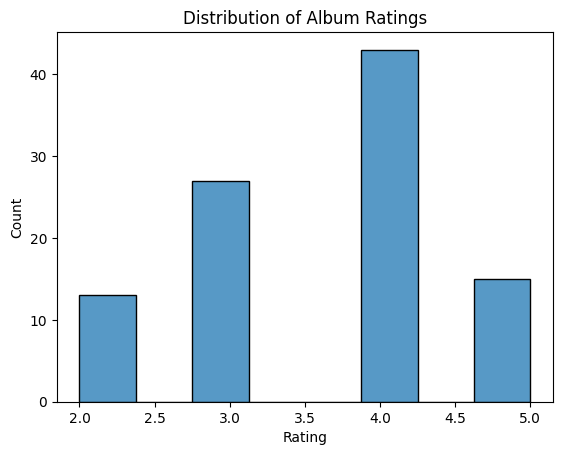

In [ ]:
sns.histplot(album['rating'])
plt.xlabel('Rating')
plt.title('Distribution of Album Ratings')
plt.show()

In [ ]:
song['rating'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating,1151.0,3.56212,1.146377,1.0,3.0,4.0,5.0,5.0


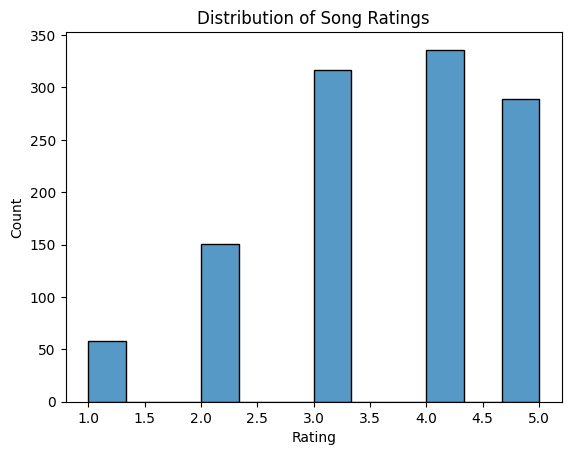

In [ ]:
sns.histplot(song['rating'])
plt.xlabel('Rating')
plt.title('Distribution of Song Ratings')
plt.show()

In [ ]:
album['year'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
year,98.0,1994.785714,15.589615,1963.0,1982.0,1997.0,2004.75,2025.0


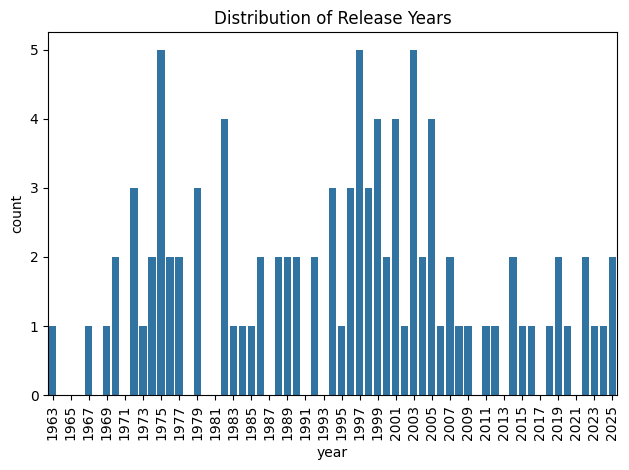

In [ ]:
sns.countplot(data = album, x = 'year',
              order = range(album['year'].min(), album['year'].max() + 1))
plt.title('Distribution of Release Years')
plt.xticks(ticks = range(0, album['year'].max() - album['year'].min() + 1, 2),
           rotation = 90)
plt.tight_layout()
plt.show()

# Data Analysis

More in depth data analysis that can hopefully uncover some patterns.

In [ ]:
avg_rating = song[['album', 'rating']].groupby('album').mean()
rating_plot = album[['album', 'rating']].groupby('album').mean().merge(avg_rating, on = 'album')

Text(0.5, 1.0, 'Album Rating Linear Model')

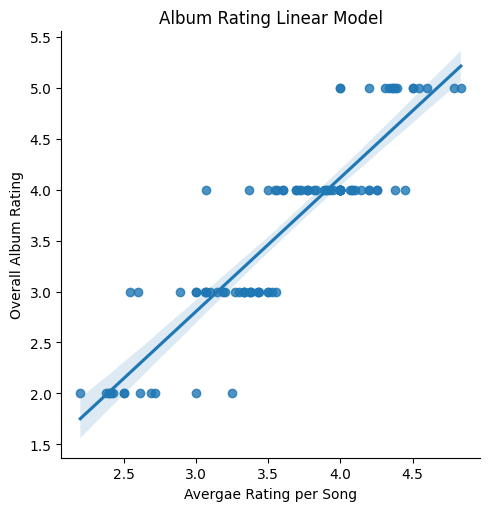

In [ ]:
sns.lmplot(data = rating_plot, x = 'rating_y', y = 'rating_x')
plt.ylabel('Overall Album Rating')
plt.xlabel('Avergae Rating per Song')
plt.title('Album Rating Linear Model')